# Word cloud plots for presentation and manuscript
Created by Ivan Lima on Tue Jun  8 2021 15:03:24 -0400

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud, datetime
print('Last updated on {}'.format(datetime.datetime.now().ctime()))

Last updated on Thu Jun 17 09:04:45 2021


In [2]:
plt.rcParams['figure.dpi'] = 100
pd.options.display.max_columns = 30

npzfile = np.load('results/NMF_TSNE.npz')
feature_names  = npzfile['feature_names']
nmf_components = npzfile['nmf_components']
topic_names    = npzfile['topic_names']
topic_names_r  = npzfile['topic_names_r']
npzfile.close()

## Selected topics 

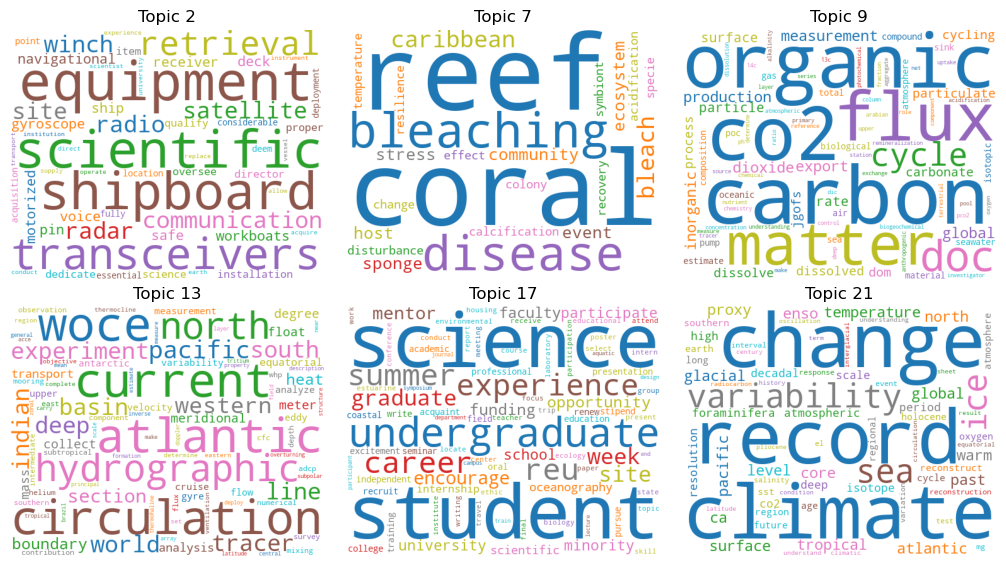

In [4]:
sort_by_feature = np.argsort(nmf_components, axis=1)[:,::-1]
nmf_components_sorted = np.take_along_axis(nmf_components, sort_by_feature, axis=1)
feature_names_sorted = feature_names[sort_by_feature]

word_freq = np.round(nmf_components_sorted * 5).astype(int)

topics = {}
topic_numbers = [2, 7, 9, 13, 17, 21]
for t in topic_numbers:
    topics[t] = []
    for n in range(len(feature_names)):
        if word_freq[t-1,n] > 0:
            topics[t] = topics[t] + [feature_names_sorted[t-1,n]] #* word_freq[t-1,n]

fig, axs = plt.subplots(2, 3, figsize=(13,7))
fig.subplots_adjust(wspace=0, hspace=0.1)
for ax, t in zip(axs.ravel(), topic_numbers):
    wc = wordcloud.WordCloud(background_color='white', width=500, height=400, colormap=plt.cm.tab10,
                         random_state=42, relative_scaling=0.5).generate(' '.join(topics[t]))
    _ = ax.imshow(wc)
    _ = ax.axis('off')
    _ = ax.set_title('Topic {}'.format(t))

## All topics 

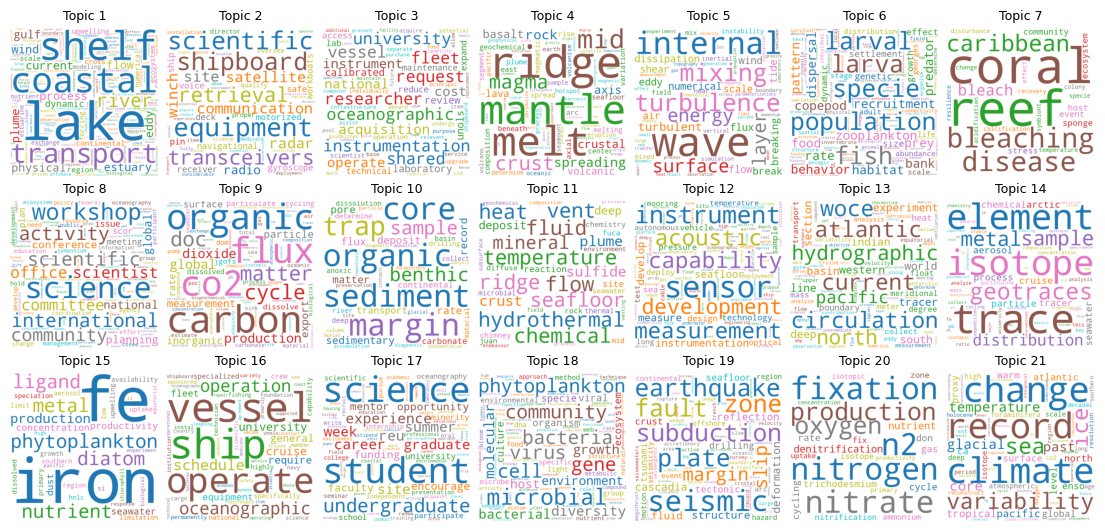

In [5]:
for t in range(1,22):
    topics[t] = []
    for n in range(len(feature_names)):
        if word_freq[t-1,n] > 0:
            topics[t] = topics[t] + [feature_names_sorted[t-1,n]] #* word_freq[t-1,n]

fig, axs = plt.subplots(3, 7, figsize=(14,6.75))
fig.subplots_adjust(wspace=0.05, hspace=0.05)
for ax, t in zip(axs.ravel(), range(1,22)):
    wc = wordcloud.WordCloud(background_color='white', width=500, height=500, colormap=plt.cm.tab10,
                         random_state=42, relative_scaling=0.5).generate(' '.join(topics[t]))
    _ = ax.imshow(wc)
    _ = ax.axis('off')
    _ = ax.set_title('Topic {}'.format(t), fontsize=9)

fig.savefig('figures/topics_wordcloud.png',dpi=600,bbox_inches='tight')

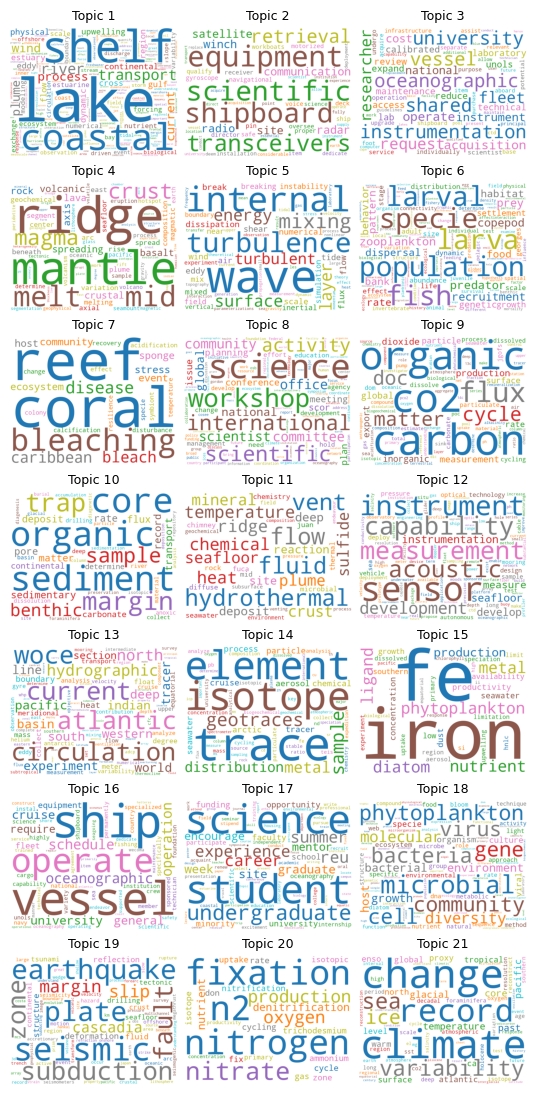

In [18]:
fig, axs = plt.subplots(7, 3, figsize=(6.75,14))
fig.subplots_adjust(wspace=0)
for ax, t in zip(axs.ravel(), range(1,22)):
    wc = wordcloud.WordCloud(background_color='white', width=650, height=500, colormap=plt.cm.tab10,
                         random_state=42, relative_scaling=0.5).generate(' '.join(topics[t]))
    _ = ax.imshow(wc)
    _ = ax.axis('off')
    _ = ax.set_title('Topic {}'.format(t), fontsize=9)

fig.savefig('figures/topics_wordcloud_paper.png',dpi=600,bbox_inches='tight')